In [2]:
import sys
sys.path.append('../src')
import pickle
import matplotlib as mpl
from matplotlib import pyplot
from ra import RoboAdvisor
import numpy as np

2023-03-25 23:28:38 INFO     Start experiments


In [6]:
ra = RoboAdvisor(
    b_r={1:0.0, 2:0.01},
    s_mu={1:0.01, 2:0.03},
    s_sig={1:0.05, 2:0.1},
    P=np.array([[0.95, 0.05], [0.1, 0.9]]),
    alpha=0.01,
    sig_eps=0.64,
    p_eps=0.05,
    beta=4,
    T=12,
    phi=3
)

ra.backwards_induction()
ra.save_data("../output/ra.pkl")


2023-03-25 16:45:25 INFO     Start experiments
2023-03-25 16:45:26 INFO     Backwards induction: calculating n = 11...
2023-03-25 16:45:47 INFO     Backwards induction: calculating n = 10...
2023-03-25 16:46:43 INFO     Backwards induction: calculating n = 9...
2023-03-25 16:47:41 INFO     Backwards induction: calculating n = 8...
2023-03-25 17:33:55 INFO     Backwards induction: calculating n = 7...
2023-03-25 17:34:50 INFO     Backwards induction: calculating n = 6...
2023-03-25 17:35:45 INFO     Backwards induction: calculating n = 5...
2023-03-25 18:21:53 INFO     Backwards induction: calculating n = 4...
2023-03-25 18:22:48 INFO     Backwards induction: calculating n = 3...
2023-03-25 18:23:43 INFO     Backwards induction: calculating n = 2...
2023-03-25 19:08:59 INFO     Backwards induction: calculating n = 1...
2023-03-25 19:09:54 INFO     Backwards induction: calculating n = 0...



In [3]:
# Load the data
with open('../output/ra.pkl', 'rb') as f:
    ra = pickle.load(f)

In [4]:
x1=[]
y1=[]
x2=[]
y2=[]

for i in range(5000):
    ra.run(x0=1, y0=1, gamma_0=5, calc_policy=True, verbose=False)
    if ra.gamma_C[6] < 10 and ra.gamma_C[6] != 5.309182732726799:
        if ra.Y[6] == 1:
            x1.append(ra.gamma_C[6])
            y1.append(ra.pi_tilde[6])
        else:
            x2.append(ra.gamma_C[6])
            y2.append(ra.pi_tilde[6])

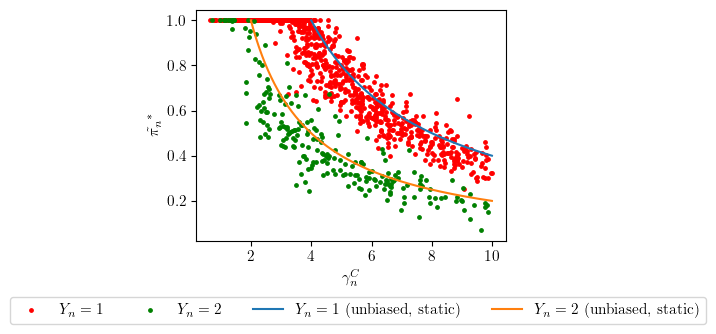

In [34]:
mpl.rcParams.update({
        "font.family": "serif",
        "font.size": 11,
        'figure.figsize': (4,3),
        "text.usetex": True
        })

pyplot.scatter(x1, y1, s=6, c="red", label=r"$Y_n=1$")
pyplot.scatter(x2, y2, s=6, c="green", label=r"$Y_n=2$")
pyplot.plot(np.arange(4,10,0.01), (0.01)/0.05/0.05/np.arange(4,10,0.01), label=r"$Y_n=1$ (unbiased, static)")
pyplot.plot(np.arange(2,10,0.01), (0.02)/0.1/0.1/np.arange(2,10,0.01), label=r"$Y_n=2$ (unbiased, static)")
pyplot.ylabel(r'$\tilde{\pi_n}^*$')
pyplot.xlabel(r'$\gamma_n^C$')
pyplot.legend(loc=(-0.6, -0.36), ncol=4)
pyplot.savefig("../output/figures/optimal_strategy.pdf", bbox_inches='tight')